# Equações não lineares

A resolução de equações não lineares surge naturalmente em diversas aplicações. Vamos começar com um exemplo simples. Considere que temos um canhão que dispara seus projéteis a uma velocidade inicial $v_0$. O objetivo é definir o ângulo $\theta$ de disparo para atingir um alvo que está a distância $d$ do canhão.

Nesse caso precisamos calibrar $\theta$ de forma a garantir que o projétil caia exatamente à distância dada. Dois fatores devem ser considerados. Logo após o disparo o projétil irá subir um pouco até a ação da gravidade inverter sua velocidade vertical ele começar a cair. O tempo total de voo é o tempo de subida mais o tempo de queda. Vamos considerar que apenas a força da gravidade age sobre o projétil, desconsiderando o efeito do atrito com o ar. Nesse caso temos que a aceleração vertical é constante igual $-g$, ou seja temos:
\begin{align*}
y(0) = 0,\quad y'(t) = v_0 \sin(\theta), \quad y''(t) &= -g \Rightarrow \\
y(t) = 0 + v_0 \sin(\theta)t - \frac{g}{2} t^2.
\end{align*}
O tempo total até o impacto será $T > 0$ é obtido resolvedo $y(t) = 0,\ t > 0$, que é dado por
$$
T = \frac{2v_0 \sin(\theta)}{g}.
$$
Já a distância horizontal pecorrida é dada por 
$$
x(t) = v_0 \cos(\theta) t.
$$
De novo estamos desprezando o atrito com o ar.

O objetivo final é encontrar $\theta$ tal que $x(T) = d$. Ou seja queremos resolver a equação
$$
\frac{2 v_0^2 \sin(\theta) \cos(\theta)}{g} = d
$$
em função de $\theta$.

Em outras palavras, se definirmos
$$
f(\theta) = 2 v_0^2 \sin(\theta) \cos(\theta) - gd,
$$
desejamos encontrar $\theta$ tal que a equação não-linear
$$
f(\theta) = 0
$$
seja válida.

Apesar de essa equação admitir solução usando-se identidades trigonométricas, vamos encará-la como uma equação que não admite solução fechada. Nesse caso precisamos de um método que nos permita resolver equações gerais, além daquelas que conseguimos resolver manualmente usando manipulações algébricas. Esse é o objetivo das próximas aulas.

# Estudo de equação lineares de uma variável

Como vimos anteriormente podemos ter interesse de resolver uma equação do tipo
$$
f(x) = 0,
$$
em que $f: \mathbb{R} \rightarrow \mathbb{R}$. Um $x$ que obedece à equação acima será chamado de uma zero ou raiz de $f$.

Vamos ver a seguir que isso pode ser resolvido por alguns métodos iterativos que irão encontrar soluções aproximadas dessa equação com precisão cada vez mais alta.

Inicialmente note que há algumas questões fundamentais que devem ser tratadas. Primeiro é preciso se perguntar se a equação tem solução. Se tal solução existir, ela é única? Vamos apresentar abaixo algumas condições matemáticas para isso. A situação mais confortável ocorre quando há solução e ela é única. Nesse caso não há dúvidas de qual o papel do método numérico: encontrar essa única raiz. Quando há mais de um zero a situação já não é tão clara. Será que todas as raízes têm sentido Físico? O método teria que encontrar todas as possíveis soluções? Isso é possível? Se o método for capaz de encontrar apenas uma solução, será que é possível escolher, ou guiar o algoritmo, para uma das raízes em particular? Quanto tempo o método demora para encontrar uma boa aproximação da, ou de uma, solução?

## Existência e unicidade de soluções

Um resultado de cáculo fundamental para tratar da existência de soluções de uma equação não linear é o teorema de Bolzano.

**Teorema de Bolzano** Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ uma função contínua em um intervalo $[a, b] \subset \mathbb{R}$. Se $f(a)f(b) < 0$ então existe $x \in (a, b)$, tal que $f(x) = 0$.

Ou seja, se uma função contínua troca de sinal em um intervalo, então ela possui pelo menos um zero (nesse intervalo). 

Por exemplo, seja a função
$$
    f(x) = x^5 - 3x^3 - 2x + 1.
$$
Seu gráfico entre $[-2,2]$ mostra existência de três raízes.

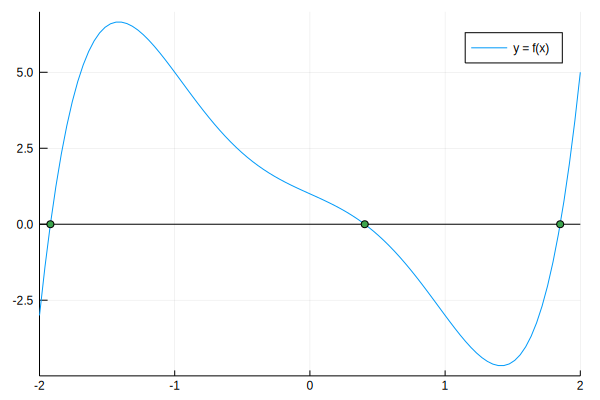

In [3]:
using Plots
gr()

# Define a função
f(x) = x.^5 - 3.0*x.^3 - 2.0*x + 1.0

# Define o intervalo
x = linspace(-2, 2, 100)


# Desenha o gráfico e o eixo x.
plot(x, f(x),xlim = (-2,2),label="y = f(x)")
plot!(x, 0.0*x, color="black",label="")
scatter!([1.8509635925292969, 0.4054832458496094, -1.9194421768188477],zeros(3),label="")

 Note que entre $[1,2]$, temos $f(1)f(2)<0$, o que implica a existência de uma raiz neste intervalo. No entanto, essa condição é apenas uma *condição necessária* para a existência de zero. É claro que uma função pode ter o mesmo sinal nos extremos de um intervalo e mesmo assim ter zeros dentro dele. Considere o caso acima no intervalo $[-2, 1.5]$.

Já para garantir a unicidade é preciso exigir mais da função $f$. Uma hipótese razoável é que ela seja constantemente crescente ou decrescente dentro do intervalo. Para isso basta exigir que a derivada da função não troque de sinal.

**Teorema** Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ diferenciável em um intervalo $[a, b] \subset \mathbb{R}$. Se $f(a)f(b) < 0$ e a derivada de $f$ tem sinal constante $(a, b)$, então existe um único $x \in (a, b)$, tal que $f(x) = 0$.

Aqui note que temos que considerar os valores da derivada em todo o intervalo e não apenas nos extremos. 

*Exercício.* Estude os zeros da função acima, encontre intervalos que contém os três zeros apresentados de forma única usando os teoremas apresentados.

## Método da Bissecção

O teorema de Bolzano serve de ponto de partida para um primeiro método iterativo para resolução de equações não-lineares conhecido como bissecção. A ideia dele é simples. Imagine que $f$ é contínua e temos na mão um intervalo $[a, b]$ como no teorema. Isso quer dizer que temos certeza que existe uma raiz nesse intervalo. Uma aproximação razoável para essa raiz usando apenas essa informação é o ponto médio do intervalo. Aparentemente isso é tudo o que se pode fazer com essa informação.

Porém podemos também calcular a função nesse ponto médio $m = \frac{a + b}{2}$ e há três possibilidades:

1. $f(m) = 0$. Nesse caso demos sorte, de fato o ponto médio é uma raiz que foi encontrada.

2. Sinal de $f(m)$ é o mesmo sinal de $f(a)$. Nesse caso podemos concluir, usando o teorema de Bolsano, que há uma raiz no intervalo $[m, b]$. Note que esse intervalo é bem menor que o original, tendo metade do seu comprimento.

3. Sinal de $f(m)$ é o mesmo sinal de $f(b)$. Nesse caso podemos concluir, usando o teorema de Bolsano, que há uma raiz no intervalo $[a, m]$. Note que esse intervalo é bem menor que o original, tendo metade do seu comprimento.

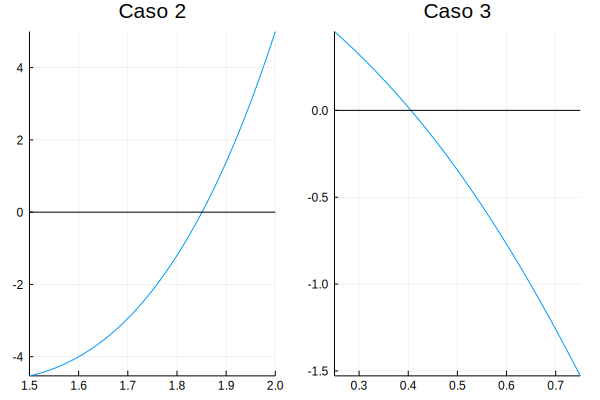

In [4]:
x = linspace(1.5, 2.0, 100)
p1 = plot(x, f(x))
p1 = plot!(x, 0*x, color="black",title="Caso 2")

y = linspace(0.25,0.75,100)
p2 = plot(y, f(y))
p2 = plot!(y, 0*y, color="black",title="Caso 3")

plot(p1,p2,layout = (1,2),legend=false)


Ou seja, ao avaliarmos  $f(x)$  conseguimos no mínimo melhorar a aproximação obtida, obtendo a cada passo um intervalo cada vez menor, dividindo o seu tamanho por 2. Note que o ponto médio do intervalo está à distância máxima de $\dfrac{b - a}{2}$ de uma raiz real do problema, já que existe raiz no intervalo. Dessa forma é natural parar o método quando a largura do intervalo for pequena o suficiente para aceitar o ponto médio como uma boa aproximação da raiz.

Isso sugere o seguinte método:

In [5]:
# Método da bisseccao
function bisseccao(f, a, b, tol=1.0e-5)
    # Recebe a função f e os extremos de um intervalo [a, b] tal que f(a)f(b) < 0.
    # Para quando b - a < 1.0e-5
    iter = 0
    while b - a >= tol
        medio = (a + b)/2.0
        println(iter, ": ", medio)
        if f(medio)*f(a) > 0.0
            a = medio
        else
            b = medio
        end
        iter += 1
    end
    
    medio = (a + b)/2.0
    println(iter, ": ", medio)
    return medio
end

# Testa primeiro com a função do gráfico.
raiz = bisseccao(f, 1.0, 2.0)
@show f(raiz)


0: 1.5
1: 1.75
2: 1.875
3: 1.8125
4: 1.84375
5: 1.859375
6: 1.8515625
7: 1.84765625
8: 1.849609375
9: 1.8505859375
10: 1.85107421875
11: 1.850830078125
12: 1.8509521484375
13: 1.85101318359375
14: 1.850982666015625
15: 1.8509674072265625
16: 1.8509597778320312
17: 1.8509635925292969
f(raiz) = -1.808781919621083e-5


-1.808781919621083e-5

Resolvendo o problema do início do texto, isto é, encontrar zero de $f(\theta) = 2 v_0^2 \sin(\theta) \cos(\theta) - gd$.

In [6]:
# Agora resolve o problema do início do texto.
v0 = 12
d = 10
g = 9.80665

println()
impacto(θ) = 2.0*v0^2*sin.(θ)*cos.(θ) - g*d
@show impacto(π/10)
@show impacto(π/4)
println("Itervalo será [π/10,π/4]")
println()
raiz = bisseccao(impacto, π/10, π/4)
@show impacto(raiz)  
# Agora com tol = 1e-8
println()
println("Tolerância de 1e-8\n")
raiz = bisseccao(impacto, π/10, π/4,1e-8)
@show impacto(raiz)  


impacto(π / 10) = -13.42542366988387
impacto(π / 4) = 45.93350000000001
Itervalo será [π/10,π/4]

0: 0.5497787143782138
1: 0.43196898986859655
2: 0.37306412761378793
3: 0.40251655874119224
4: 0.38779034317749006
5: 0.380427235395639
6: 0.37674568150471344
7: 0.3749049045592507
8: 0.3739845160865193
9: 0.37444471032288495
10: 0.37467480744106785
11: 0.3745597588819764
12: 0.3746172831615221
13: 0.3745885210217492
14: 0.37457413995186284
15: 0.37458133048680603
16: 0.37457773521933446
impacto(raiz) = 0.00046411539317148254

Tolerância de 1e-8

0: 0.5497787143782138
1: 0.43196898986859655
2: 0.37306412761378793
3: 0.40251655874119224
4: 0.38779034317749006
5: 0.380427235395639
6: 0.37674568150471344
7: 0.3749049045592507
8: 0.3739845160865193
9: 0.37444471032288495
10: 0.37467480744106785
11: 0.3745597588819764
12: 0.3746172831615221
13: 0.3745885210217492
14: 0.37457413995186284
15: 0.37458133048680603
16: 0.37457773521933446
17: 0.37457593758559865
18: 0.3745750387687308
19: 0.37457548

-1.4326460018310172e-7

Uma característica interessante do método da bissecção é que ele pede usa apenas os valores da função em alguns pontos para decidir o que fazer. Além disso o seu comportamento é bem previsível. O comprimento do intervalo é dividido por 2 a cada iteração. Assim podemos prever quantas iterações serão necessárias para terminar o método como função do comprimento inicial e da precisão, `epsilon`, desejada. Isso fica como exercício. 

Como foi possível ver acima essa convergência ainda é um pouco lenta. Vamos estudar as seguir um outro método com comportamento, em geral, bem mais rápido.

## O método de Newton

O método da bissecção tem algumas vantagens interessantes. Em primeiro lugar sua convergência é garantida, já que a cada passo a distância a uma raiz é divida por dois, indo, naturalmente, para zero. Uma segunda vantagem interessante é a possibilidade de estimar a priori o número de iterações necessárias para se obter a precisão desejada. Por fim, ele pode ser implementado somente usando informação sobre o cômputo da função.

Vamos agora estudar um outro método que usa mais informação, além dos simples valores funcionais. Se $f$ for diferenciável podemos aproveitar informação sobre a sua derivada para obter um algoritmo extremamente rápido em vários casos. A ideia fundamental é lembrar que se $f$ é diferenciável, então sabemos aproximar a função localmente por uma função linear, usando uma expansão de Taylor de primeira ordem.
$$
f(y) \approx f(x) + f'(x)(y - x).
$$
Agora imagine que o ponto já conhecido, $x_k$, está próximo da raiz, de modo que a aproximação de Taylor apresentada acima é muito boa para prever o comportamento de $f$ de $x_k$ até a raiz. Podemos então pensar em substituir $f$ por essa aproximação linear, achar a raiz da aproximação e tomá-la como nova estimativa da raiz original. Ou seja queremos encontrar $x_{k + 1}$ tal que
$$
f(x_k) + f'(x_k)(x_{k+1} - x_k) = 0.
$$
É fácil ver que a nova estimativa é dada por
$$
x_{k + 1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$
Veja o gráfico abaixo para ter uma ideia do que está ocorrendo. Nela o ponto $x_k = -1/2$ e a aproximação linear da curva azul é a reta verde. O ponto $x_{k + 1}$ é então ponto em que a aproximação linear cruza o eixo $x$. 

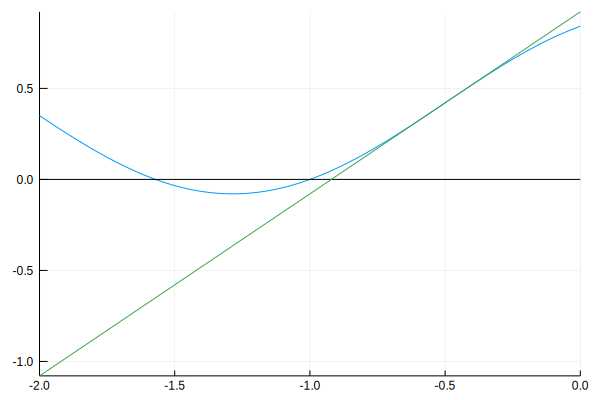

In [7]:
f(x) = sin.(x + 1.0).*cos.(x)
df(x) = cos.(x)*cos.(x + 1.0) - sin.(x)*sin.(x + 1.0)
x = linspace(-2.0, 0.0, 100)
plot(x, f(x))
plot!(x, 0*x, color="black")

# Apresenta o modelo linear em torno de xk
xk = -0.5
linearmodel(x) = f(xk) + df(xk)*(x - xk)
plot!(x, linearmodel(x),legend=false)

O método de Newton tem normalmente convergência extremamente rápida se o ponto inicial é uma boa aproximação da solução desejada. Um primeiro exemplo disso que vamos explorar é pensar no método de Newton sendo usado para calcular a raiz quadrada de um número. O problema de calular a raiz de um número $a > 0$ dado pode ser visto como o problema de resolver a equação
$$
f(x) = x^2 - a = 0.
$$
Nesse caso é muito fácil calcular a derivada e a iteração
$$
x_{k + 1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$
pode ser escrita como 
$$
x_{k + 1} = x_k - \frac{x_k^2 - a}{2 x_k} = \frac{1}{2}\left(x_k + \frac{a}{x_k} \right).
$$
Vamos implementar o método e tentar calcular $\sqrt{10}$ partindo de $x_0 = 1$.

In [8]:
a = 10
xk = 3.5
prec = 1.0e-14


iters = 0
println(iters, ": ", xk)
while abs((xk*xk - a)/a) > prec
    xk = 0.5*(xk + a/xk)
    iters += 1
    println(iters, ": ", xk)
end
println("\nValor 'exato': ", sqrt(a))
@show xk*xk

0: 3.5
1: 3.178571428571429
2: 3.162319422150883
3: 3.1622776604441363
4: 3.162277660168379

Valor 'exato': 3.1622776601683795
xk * xk = 9.999999999999998


9.999999999999998

Note que a convergência ocorre de forma extremamente rápida. Na iteração 2, o número já foi calculado com 1 casa correta, na próxima iteração o número de casa corretas já duplicou passando para 2, depois para 4, depois para 8 casas e por fim 15. Ou seja, o número de casas corretas dobrou aproximadamente por iteração. 

Para entender porque isso ocorre vamos lembrar o que nos diz o teorema de Taylor se $f$ for $n + 1$ vezes diferenciável.

**Teorema de Taylor**. Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ diferenciável $n + 1$ vezes em um intervalo que contenha os valores $x$ e $y$. Então existe $\xi$ no intervalo aberto que une $x$ e $y$ tal que
$$
f(y) = f(x) + f'(x)(y - x) + \frac{f''(x)}{2}(y - x)^2 + \ldots + \frac{f^{(n)}(x)}{n!}(y - x)^n + \frac{f^{(n+1)}(\xi)}{(n + 1)!}(y - x)^n.
$$

De posse desse resultado podemos provar que

**Teorema (da Convergência Quadrática de Newton)**. Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ uma função duas vezes continuamente diferenciável. Se $x_0$ inicia perto de uma raiz $x^*$ onde a derivada de $f$ é não nula, então o método de Newton está bem definido e gera uma sequência convergindo para $x^*$. Além disso, existe $M > 0$ tal que
$$
| x_{k+1} - x^* | \leq M | x_k - x^* |^2.
$$

**Prova.** Usando o teorema de Taylor com $x = x_k$ e $y = x^*$  temos
\begin{align*}
| x_{k+1} - x^* | &= | x_k - f(x_k)/f'(x_k) - x^* | \\
                  &= \left| x_k + \left(x^* - x_k + \frac{f''(\xi_k)}{2 f'(x_k)}(x^* - x_k)^2 \right)- x^* \right| \\
                  &= \left| \frac{f''(\xi_k)}{2 f'(x_k)} \right| | x_k - x^* |^2,
\end{align*}
em que $\xi_k$ está no intervalo que une $x_k$ e $x_*$.

Por outro lado podemos deduzir alguns limitantes interessantes se fizermos hipóteses sobre a distância de $x_k$ até $x^*$.

1. Sabemos que |f''(x)| atinge máximo no intervalo $[x^* - 1, x^* + 1]$. Chamemos o valor de máximo de $m$. Temos então que se $| x_k - x_* | \leq 1$ teremos $|f''(\xi_k)| \leq m$ para todo $\xi_k$ no intervalo que une $x_k$ e $x_*$.

1. Como $f'(x^*) \neq 0$, sabemos que para pontos suficientemente próximos de $x_*$, $|f'(x)| \geq |f'(x^*)|/2 > 0$. Isto é, existe $\delta_1 > 0$ tal que se $| x - x^* | \leq \delta_1$ então $|f'(x)| \geq |f'(x^*)|/2$.

Assim, se $| x_k - x_* | < \min(1, \delta_1)$, teremos 
$$
|x_{k+1} - x^*| \leq \frac{2m}{f'(x^*)} |x_k - x^*| |x_k - x^*|.
$$
Portanto, se chmarmos de $\delta = \min(1, \delta_1, f'(x^*)/(4m))$ e $| x_k - x_* | < \delta$, teremos
$$
|x_{k+1} - x^*| \leq \frac{1}{2} |x_k - x^*|.
$$
Concluímos então que nesse caso a sequência converge a $x^*$ e todas as propriedades obtidas continuam valendo. Portando se $| x _0 - x^* | \leq \delta$ podemos concluir que:

1. Toda a sequência se mantem a essa distância máxima de $x^*$.

1. Em toda a sequência a derivada $f'(x_k)$ tem módulo maior ou igual a $|f'(x^*)|/2$, portando é sempre não nula e o método está bem definido.

1. Por fim, chamando de $M = \frac{2m}{f'(x^*)}$, teremos
$$
| x_{k+1} - x^* | \leq M | x_k - x^* |^2.
$$
$\blacksquare$

O fato da distância à solução, uma vez que cai abaixo de $1$, diminuir elevando o valor anterior ao quadrado explica o comportamento observado no exemplo, com o número de casas decimais corretas duplicando a cada iteração.

Um fato importante é que o teorema acima só garante a convergência quando o ponto inicial $x_0$ estiver perto de uma raiz com derivada não nula. Caso contrário não há garantias para a convergência, em particular se o ponto inicial estiver longe das raízes. De fato, a convergência pode falhar.

**Colocar um exemplo de divergência baseado em uma função sigmóide.**

Existem algumas alternativas para se obter um método que convirja a partir de qualquer ponto inicial (globalização do método):

* Começar com outro método com covergência garantida.

* Fazer algum tipo de busca no passo de Newton para forçar $| f(x_{k+1}) |$ a diminuir, encurtando o passo se necessário (busca linear)

* Região de confiança.

Outro problema que também pode ocorrer é encontrar um ponto de derivada nula (ou de derivada muito pequena). Esse tipo de situação pode também ser resolvido com estratégias parecidas com as  estratégias descritas acima.

* Usar a derivada no ponto anterior.

* Usar uma iteração de outro algoritmo.

## Critério de parada

Idealmente desejamos parar o método quando o erro $e_k = |x_k - x^*|$ for pequeno. Mas não conhecemos $x^*$, ele é exatamente que desejamos encontrar. 

Uma alternativa seria usar o próprio valor de $| f(x_k) |$. A expectativa é que quando esse valor for pequeno podemos esperar que $e_k$ seja pequeno. De fato usando a expansão de Taylor temos
\begin{gather*}
f(x_k) \approx f(x^*) - f'(x^*)(x_k - x^*) \implies \\
e_k \approx | f(x_k) | / | f'(x^*) |.
\end{gather*}

Assim, vemos que se $| f(x_k) |$ é pequeno esperamos que o erro $e_k$ seja pequeno. Note que essa relação depende também do valor de $|f'(x^*)|$ se esse valor for pequeno é necessário que $| f(x^k) |$ seja muito pequeno para $e_k$ também o seja e vice-versa. Faça alguns gráficos para se convencer disso.

Outra possibilidade é parar o método quando o tamanho do último passo dado $s_{k + 1}  = x_{k + 1} - x_k$ se tornar o método muito pequeno, ou seja quando o método já está "quase parando".

Estamos agora prontos para apresentar uma implementação do método de Newton. Nela vamos supor que o ponto inicial está perto de uma raiz e que as derivadas encontradas são sempre não nulas

0: π = 3.1415926535897...
1: 3.482101334145349
2: 3.515201753625586
3: 3.5161673222214147
4: 3.5161681880886286
5: 3.516168188089326
impacto(raiz) = 2.842170943040401e-14
0: 2
1: 1.8666666666666667
2: 1.8667603990088844
func2(raiz) = -1.0084018065015243e-9


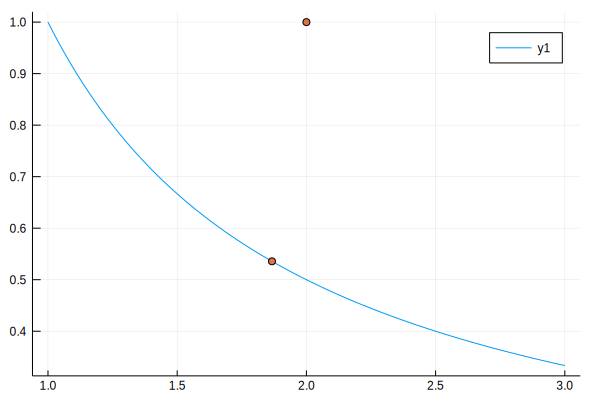

In [46]:
# Método de Newton simples para resolução de equações não lineares
function newton_eq(f, df, x, epsilon=1.0e-5, maxiters=100)

    iter = 0
    while iter < maxiters && abs(f(x)) > epsilon
        println(iter, ": ", x)
        x -= f(x)/df(x)
        iter += 1
    end

    println(iter, ": ", x)
    return x
end
x = linspace(1,3,100)
dimpacto(θ) = 2*v0^2*cos(2.0.*θ)

raiz = newton_eq(impacto, dimpacto, π, 1.0e-10)
@show impacto(raiz)    
func(x) = (x-2) + (x.^(-1.) - 1).*(-x.^(-2.))
dfunc(x) = 1 + 3.*x.^(-4.) -2.*x.^(-3.)
func2(x) = x.^4. -2.*x.^3 - 1 + x
dfunc2(x) = 4x.^3 - 6x.^2 + 1
raiz = newton_eq(func,dfunc,2,1e-5)
@show func2(raiz)
plot(x,1./x)
scatter!([2;raiz],[1;raiz^(-1.)],label="")


Compare a velocidade de convergência do método da bissecção apresentado acima. Note também que a solução final obtida é bem mais precisa.

### Taxas de convergência

É interessante observar a velocidade de convergência estimada para o método de Newton e compará-la para o caso de bissecção.

No caso da bissecção o método é construido para garantir que de uma interessão para outra o erro caia pelo menos pela metade. Ou seja temos que $e_k = | x_k - x_* | $.
$$
e_{k + 1} \leq \frac{1}{2} e_k.
$$
Isso garante que o erro de aproximação cai à taxa constante a cada iteração. Quando o erro cai dessa forma dizemos que a convergência é *linear* (com constante $\frac{1}{2}$). Isso garante que $e_k \rightarrow 0$. Note que o mesmo ocorreria se a constante fosse qualquer número $\alpha < 1$ no lugar de $\frac{1}{2}$. Nesse caso dizemos que o método converge de forma linear com constante $\alpha$. 

No caso do método de Newton a fórmula obtida foi
$$
e_{k + 1} \leq M e_k^2 = (M e_k) e_k.
$$
Como também provamos que o método é convergente, ou seja que $e_k \rightarrow 0$, vemos que a partir de uma certa iteração $M e_k < \frac{1}{2}$. Portanto, a partir de um certo ponto, o método de Newton passa a ficar mais rápido do que a bissecção. Mais do que isso, já na próxima iteração a diferença de velocidade é maior, e depois maior ainda e assim por diante. Ou seja, com as iterações o método de Newton vai ficando "infinitamente" mais rápido do que a bissecção. Isso é capturado pela equação
$$
\lim_{k \rightarrow \infty} \frac{e_{k+1}}{e_k} = 0.
$$
O que ela diz é que a medida que o tempo passa o método fica melhor do que a convergência linear com qualquer constante $\alpha$ fixada. Dizemos que um método que cujos erros obedecem à equação acima tem convergência *superlinear*.

O caso do método de Newton é mais específico pois sabemos que a constante vai para zero na mesma velocidade que $e_k$. Nesse caso chamamos a *convergência de quadrática*.

## Método secante

Vimos que o método de Newton para resolução de equações não-lineares é uma ótima alternativa. De fato ele atinge alta precisão rapidamente, superando o método da bissecção na maioria dos casos. Porém, para utilizá-lo é necessário saber calcular não somente a função $f$ mas também sua derivada $f'$ e há situações em que o calculo da derivada pode ser difícil, mesmo quando a função é diferenciável. Um exemplo disso é quando a função é calculada por uma simulação numérica, ou quando apenas temos acesso a ela através de um programa de computador que é visto como uma caixa preta. Além disso o esforço computacional necessário pelo método de Newton, que exige um cômputo de $f$ e sua derivada a cada passo é maior do que o esforço exigido pela bissecção que calcula apenas a função. 

Uma alternativa nessa situação é recordar a definição de derivada
$$
f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}.
$$ 

Essa definição nos dá uma informação interessante, se temos dois pontos próximos $x$ e $y$, podemos aproximar a derivada de $f$ em $x$ por
$$
f'(x) \approx \frac{f(y) - f(x)}{y - x}.
$$

Será que podemos usar isso para gerar um algoritmo iterativo que aproxime o comportamento do método de Newton sem que haja a necessidade de se calcular derivadas explicitamente? Vejamos. Um método iterativo que gera uma sequência $x_k$ que converge para uma raiz $x_*$ teremos que os iterados consecutivos $x_{k - 1}$ e $x_{k}$ tem que ficar cada vez mais próximos. Isso ocorre porque eles estão se aproximando do mesmo ponto $x_*$ a medida que $k$ aumenta. Assim, a discussão acima sugere que
$$
f'(x_k) \approx \frac{f(x_{k-1}) - f(x_k)}{x_{k -1} - x_k}.
$$
Lembrando a dedução do método de Newton temos
$$
f(x) \approx f(x_k) + f'(x_k)(x - x_k) \approx f(x_k) + \frac{f(x_{k-1}) - f(x_k)}{x_{k -1} - x_k} (x - x_k).
$$
A expressão mais da direita é também uma aproximação afim de $f$ próximo a $x_k$. Assim, da mesma forma que vimos em Newton, podemos definir um método iterativo definindo como novo ponto $x_{k + 1}$ a raiz dessa equação afim. Isso nos leva a fórmula do *método Secante*.
$$
x_{k+1} = x_k - \frac{f(x_k)(x_{k - 1} - x_k)}{f(x_{k - 1}) - f(x_k)}.
$$
A sua implementação é muito semelhante a do método de Newton, vamos fazê-la a seguir a executar um teste para ver o quão rápido é esse método para calcular o momento de impacto.

In [ ]:
# Método Secante simples para resolução de equações não lineares. 
# Note que ele precisa de dois pontos iniciais x0 e x1.
function secante(f, x0, x1, epsilon=1.0e-5, maxiters=100)

    xant = x0
    fant = f(xant)
    println(0, ": ", x0)
    x = x1
    fx = f(x)
    iter = 1
    while iter < maxiters && abs(fx) > epsilon
        println(iter, ": ", x)
        df = (fant - fx) / (xant - x)
        xant = x
        x -= fx/df
        fant = fx
        fx = f(x)
        iter += 1
    end

    println(iter, ": ", x)
    return x
end

raiz = secante(impacto, π - 0.1, π, 1.0e-10)
@show impacto(raiz)   

Vemos nesse exemplo que o método secante também pode convergir rapidamente, realizando apenas duas iterações a mais do que o método de Newton. De fato pode-se provar os seguinte resultado de convergência.

**Teorema (da Convergência Superlinear do método secante)**. Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ uma função duas vezes continuamente diferenciável. Se $x_0$ inicia perto de uma raiz $x^*$ onde a derivada de $f$ é não nula, então o método secante está bem definido e gera uma sequência convergindo para $x^*$. Além disso, 
$$
\lim_{k \rightarrow \infty} \frac{| x_{k+1} - x^* |}{| x_k - x^* |} = 0.
$$

Uma análise atenta do limite acima mostra que o método secante vai também ficando cada vez mais rápido, ganhando de qualquer método com convergência linear, daí chamarmos esse tipo de convergência de superlinear. 

# Método de Newton para Sistemas Não-Lineares

O método de Newton admite uma generalização direta para resolver sistemas de equações não-lineares. Nesse caso temos uma função $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$ e queremos resolver $F(x) = 0,\ x \in \mathbb{R}^n$. Em outras palavras, queremos encontrar $x_1, x_2, \ldots, x_n \in \mathbb{R}^n$ tais que
\begin{align*}
f_1(x_1, x_2, \ldots, x_n) &= 0 \\
f_2(x_1, x_2, \ldots, x_n) &= 0 \\
\quad\quad\quad\vdots &\\
f_n(x_1, x_2, \ldots, x_n) &= 0,
\end{align*}
em que $F(x) = (f_1(x), f_2(x), \ldots, f_n(x))$.

Nesse caso podemos usar resultados de Cálculo (2). Lembremos que cada função $f_i: \mathbb{R}^n \rightarrow R$ admite uma aproximação linear
$$
f_i(y) \approx f_i(x) + \nabla f_i(x)'(y - x),\ i = 1, \ldots, n.
$$
em que $\nabla f(x)$ é o gradiente de $f_i$ em $x$. Podemos escrever todas essas equações de forma compacta lembrando a definição da matriz jacobiana de $F$ que é composta por linhas com os gradientes:
$$
J_F(x) = \left[ \begin{array}{c}
\nabla f_1(x_1, x_2, \ldots, x_n))^T \\
\nabla f_s(x_1, x_2, \ldots, x_n))^T \\
\vdots \\
\nabla f_n(x_1, x_2, \ldots, x_n))^T
\end{array} \right].
$$
Nesse caso escrevemos
$$
F(y) \approx F(x) + J_F(x)(y - x).
$$

Podemos então aplicar as mesmas ideias que nos levaram a deduzir o método de Newton. 

Queremos resolver
$$
F(x) = 0.
$$
Já temos uma aproximação da solução $x^k$ e queremos melhorá-la. Uma ideia é então substituir a função não-linear $F$ por sua aproximação linear calculada nesse último ponto e usar o seu zero como novo ponto. Isso é queremos resolver
$$
F(x^{k + 1}) \approx F(x^k) + J_F(x^k)(x^{k + 1} - x^k) = 0.
$$
Isolando $x^{k + 1}$, que pode ser feito se o jacobiano for inversível, obtemos
$$
x^{k +1} = x^k - J_F(x^k)^{-1}F(x^k).
$$
Uma clara generalização da equação que define o método de Newton no caso unidmensional. 

Uma observação importante é que, apesar da fórmula acima sugerir que devemos inicialmente inverter a matriz jacobiana, não há necessidade de inverter nenhuma matriz, o que exigiria a soluçào de $n$ sistemas lineares gerando uma complexidade total de $O(n ^4)$. Basta resolver inicialmente um único sistema
$$
J_F(x^k)s^{k + 1} = -F(x^k)
$$ 
e em seguida atualizar
$$
x^{k + 1} = x^{k} + s^{k + 1}.
$$
Se o jacobiano for inversível, claramente, esses dois passos são equivalentes à fórmula do método de Newton dada acima.

Vejamos um exemplo. Se quisermos resolver
$$
F(x) = \left[ \begin{array}{c} 
    x_1^2 - e^{-x_1 x_2} \\
    x_1x_2 + \sin(x_1)
    \end{array} \right] = 0.
$$
Temos
$$
J_F(x) = \left[ \begin{array}{cc}
    2x_1 + x_2e^{-x_1 x_2} & x_1 e^{-x_1 x_2} \\
    x_2 + \cos(x_1)        & x_1
\end{array} \right].
$$
Vamos implementar o método de Newton e testá-lo.

In [ ]:
# Método de Newton simples para resolução de equações não lineares
function newton(F, JF, x, epsilon=1.0e-5, maxiters=100)

    iter = 0
    while iter < maxiters && norm(F(x), Inf) > epsilon
        println(iter, ": ", norm(F(x), Inf))
        s =  -JF(x)\F(x)
        x += s
        iter += 1
    end

    println(iter, ": ", norm(F(x), Inf))
    return x
end

F(x) = [x[1]^2 - exp(-x[1]*x[2]), x[1]*x[2] + sin(x[1])]
JF(x) = [[2*x[1] + x[2]*exp(-x[1]*x[2]), x[2] + cos(x[1])] [x[1]*exp(-x[1]*x[2]), x[1]]] 
x0 = [2.0, 1.0]
raiz = newton(F, JF, x0)
@show F(raiz)

Note que temos nesse caso o mesmo problema para determinar o momento ideal de parada. Assim como no método de Newton para equações podemos usar a norma de $F(x)$ para definir quando o ponto está perto da solução. A justificativa para isso é continuidade. Uma justificativa mais formal pode ser obtida usando a expansão de Taylor em torno da solução $x^*$, assim como foi feito no método para uma variável. Outras opções de critério de parada que são muito usadas na prática são:
\begin{gather}
\| F(x) \| \leq \epsilon \| F(x^0) \| \\
\| F(x) \| \leq \epsilon_0 \| F(x^0) \| + \epsilon_1 \\
\| s^k \| \leq \epsilon.
\end{gather}

Precisamos também destacar que a operação que mais cara em cada iteração do método de Newton é a resolução do sistema linear para cômputo do passo. Isso pode ser feito com os métodos como a fatoração LU. Em alguns casos, principalmente quando as matrizes envolvidas são grandes e esparsas, pode ser interessante usar um método iterativo para achar o passo de Newton. Nesse caso o passo não é calculado exatamente, apenas uma aproximação é obtida. Se a aproximação obtida for boa o método se comporta muitas vezes bem e é conhecido como Newton *inexato* ou *truncado*. 

Outro problema de do método de Newton para equações unidimensionais que também ocorre com o caso multidimensional é que a convergência não é garantida se o ponto inicial não estiver próximo de um zero onde a matriz Jacobiana não nula. O resultado típico de convergência é muito parecido com o resultado para uma dimensão apenas.

**Teorema (da Convergência Quadrática de Newton).** Seja $F:\mathbb{R}^n \rightarrow \mathbb{R^n}$ uma função duas vezes continuamente diferenciável. Se $x^0$ inicia perto de uma raiz $x^*$ para a qual a matriz jacobiana de $F$ é inversível, então o método de Newton está bem definido e gera uma sequência convergindo para $x^*$ para qual existe $ M> 0$  tal que
$$
\|x^{k+1}−x^∗\| \leq M \|x^k−x^∗\|^2.
$$